In [ ]:
# Saiket Paper Cement

In [24]:
#!pip install shap
#! pip install pycaret[Full]
#!pip install graphviz
#!pip install pandas openpyxl
#!pip install openpyxl

In [1]:
import pandas as pd
import numpy as np

In [2]:
# data uploaded on github along with the Codes
import pandas as pd

url = "https://raw.githubusercontent.com/mk10oct/Saikat_cement_paper/main/Concrete_Data.csv"
data1 = pd.read_csv(url)

print(data1.head())

   SNO     CC    BFS   FA     WT   SP      CA    FAC  AGE    CCS
0    1  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  79.99
1    2  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  61.89
2    3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  40.27
3    4  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  41.05
4    5  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  44.30


In [3]:
# import the data set from the desktop
#data1 =  pd.read_csv("D:\\1 Research\\2024\\Saikat\\Paper 2 Cement Strength IEEE\\Concrete_Data.csv")
# data1.head()

In [4]:
# Code for correlation
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

def corr_with_pstars(df):
    cols = df.columns
    corr_df = pd.DataFrame("", index=cols, columns=cols)

    for i in range(len(cols)):
        for j in range(len(cols)):
            r, p = pearsonr(df[cols[i]], df[cols[j]])

            if p < 0.001:
                stars = "***"
            elif p < 0.01:
                stars = "**"
            elif p < 0.05:
                stars = "*"
            else:
                stars = ""

            corr_df.iloc[i, j] = f"{r:.3f}{stars}"

    return corr_df

# Apply
corr_star_matrix = corr_with_pstars(data1)
corr_star_matrix


,SNO,CC,BFS,FA,WT,SP,CA,FAC,AGE,CCS
SNO,1.000***,-0.223***,0.020,0.071*,0.217***,-0.185***,-0.111***,-0.043,-0.202***,-0.311***
CC,-0.223***,1.000***,-0.275***,-0.397***,-0.082**,0.092**,-0.109***,-0.223***,0.082**,0.498***
BFS,0.020,-0.275***,1.000***,-0.324***,0.107***,0.043,-0.284***,-0.282***,-0.044,0.135***
FA,0.071*,-0.397***,-0.324***,1.000***,-0.257***,0.378***,-0.010,0.079*,-0.154***,-0.106***
WT,0.217***,-0.082**,0.107***,-0.257***,1.000***,-0.658***,-0.182***,-0.451***,0.278***,-0.290***
SP,-0.185***,0.092**,0.043,0.378***,-0.658***,1.000***,-0.266***,0.223***,-0.193***,0.366***
CA,-0.111***,-0.109***,-0.284***,-0.010,-0.182***,-0.266***,1.000***,-0.178***,-0.003,-0.165***
FAC,-0.043,-0.223***,-0.282***,0.079*,-0.451***,0.223***,-0.178***,1.000***,-0.156***,-0.167***
AGE,-0.202***,0.082**,-0.044,-0.154***,0.278***,-0.193***,-0.003,-0.156***,1.000***,0.329***
CCS,-0.311***,0.498***,0.135***,-0.106***,-0.290***,0.366***,-0.165***,-0.167***,0.329***,1.000***


In [6]:
data1.corr(method="pearson")

,SNO,CC,BFS,FA,WT,SP,CA,FAC,AGE,CCS
SNO,1.000000,-0.222582,0.019961,0.071006,0.217029,-0.185161,-0.111092,-0.043104,-0.202117,-0.311084
CC,-0.222582,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BFS,0.019961,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FA,0.071006,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WT,0.217029,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SP,-0.185161,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.111092,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FAC,-0.043104,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
AGE,-0.202117,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CCS,-0.311084,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [6]:
# drop the SNO from the data file, and missing values, Though There are no Missing values
data2= data1.drop(["SNO"], axis=1)
data3 = data2.dropna()

In [7]:
data2.describe()

,CC,BFS,FA,WT,SP,CA,FAC,AGE,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
data3.describe()

,CC,BFS,FA,WT,SP,CA,FAC,AGE,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
data1.describe()

,SNO,CC,BFS,FA,WT,SP,CA,FAC,AGE,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,515.500000,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,297.479691,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,1.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,258.250000,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,515.500000,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,772.750000,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,1030.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
# Calcualte Skewness and Kurtosis

In [9]:
import pandas as pd

desc = data1.describe()

desc.loc['skewness'] = data1.skew(numeric_only=True)
desc.loc['kurtosis'] = data1.kurtosis(numeric_only=True)

desc

,SNO,CC,BFS,FA,WT,SP,CA,FAC,AGE,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,515.500000,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,297.479691,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,1.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,258.250000,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,515.500000,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,772.750000,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,1030.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000
skewness,0.000000,0.509481,0.800717,0.537354,0.074628,0.907203,-0.040220,-0.253010,3.269177,0.416977
kurtosis,-1.200000,-0.520652,-0.508175,-1.328746,0.122082,1.411269,-0.599016,-0.102177,12.168989,-0.313725


In [11]:
# calculate Decriptive statistics and create a table
import pandas as pd

# Basic descriptive statistics
desc = data1.describe()

# Skewness and Kurtosis
desc.loc['skewness'] = data1.skew(numeric_only=True)
desc.loc['kurtosis'] = data1.kurtosis(numeric_only=True)

# Quartiles
Q1 = data1.quantile(0.25, numeric_only=True)
Q3 = data1.quantile(0.75, numeric_only=True)

# IQR
IQR = Q3 - Q1

# 1.5 IQR bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Add to describe table
desc.loc['IQR'] = IQR
desc.loc['Lower Bound (Q1 - 1.5 IQR)'] = lower_bound
desc.loc['Upper Bound (Q3 + 1.5 IQR)'] = upper_bound

desc

,SNO,CC,BFS,FA,WT,SP,CA,FAC,AGE,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,515.500000,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,297.479691,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,1.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,258.250000,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,515.500000,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,772.750000,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,1030.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000
skewness,0.000000,0.509481,0.800717,0.537354,0.074628,0.907203,-0.040220,-0.253010,3.269177,0.416977
kurtosis,-1.200000,-0.520652,-0.508175,-1.328746,0.122082,1.411269,-0.599016,-0.102177,12.168989,-0.313725


In [ ]:
# Box plot 

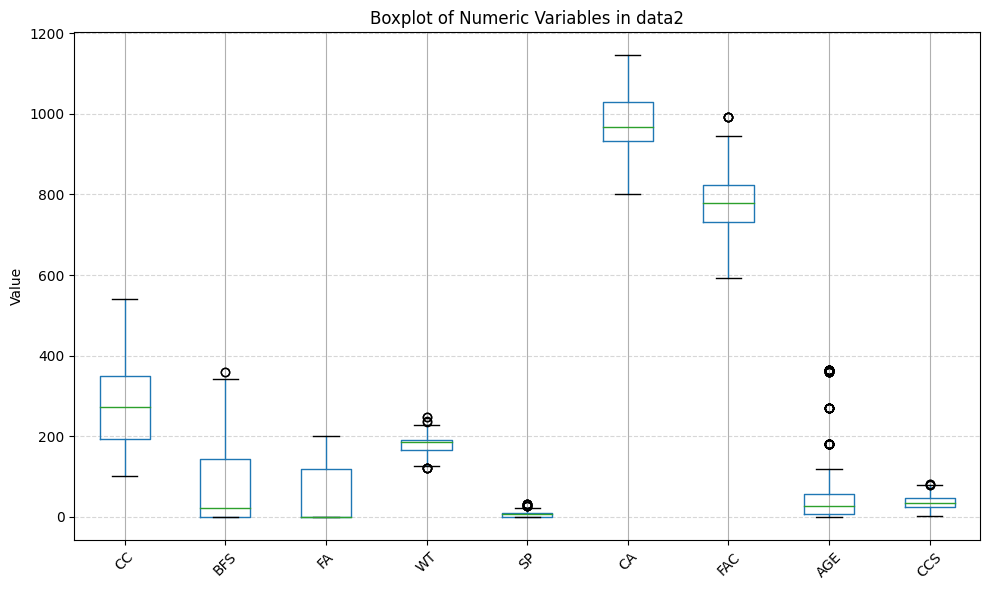

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

data2.boxplot()

plt.title('Boxplot of Numeric Variables in data2')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Paired Plot

C:\Users\Manohar Kapse\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manohar Kapse\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manohar Kapse\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Manohar Kapse\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

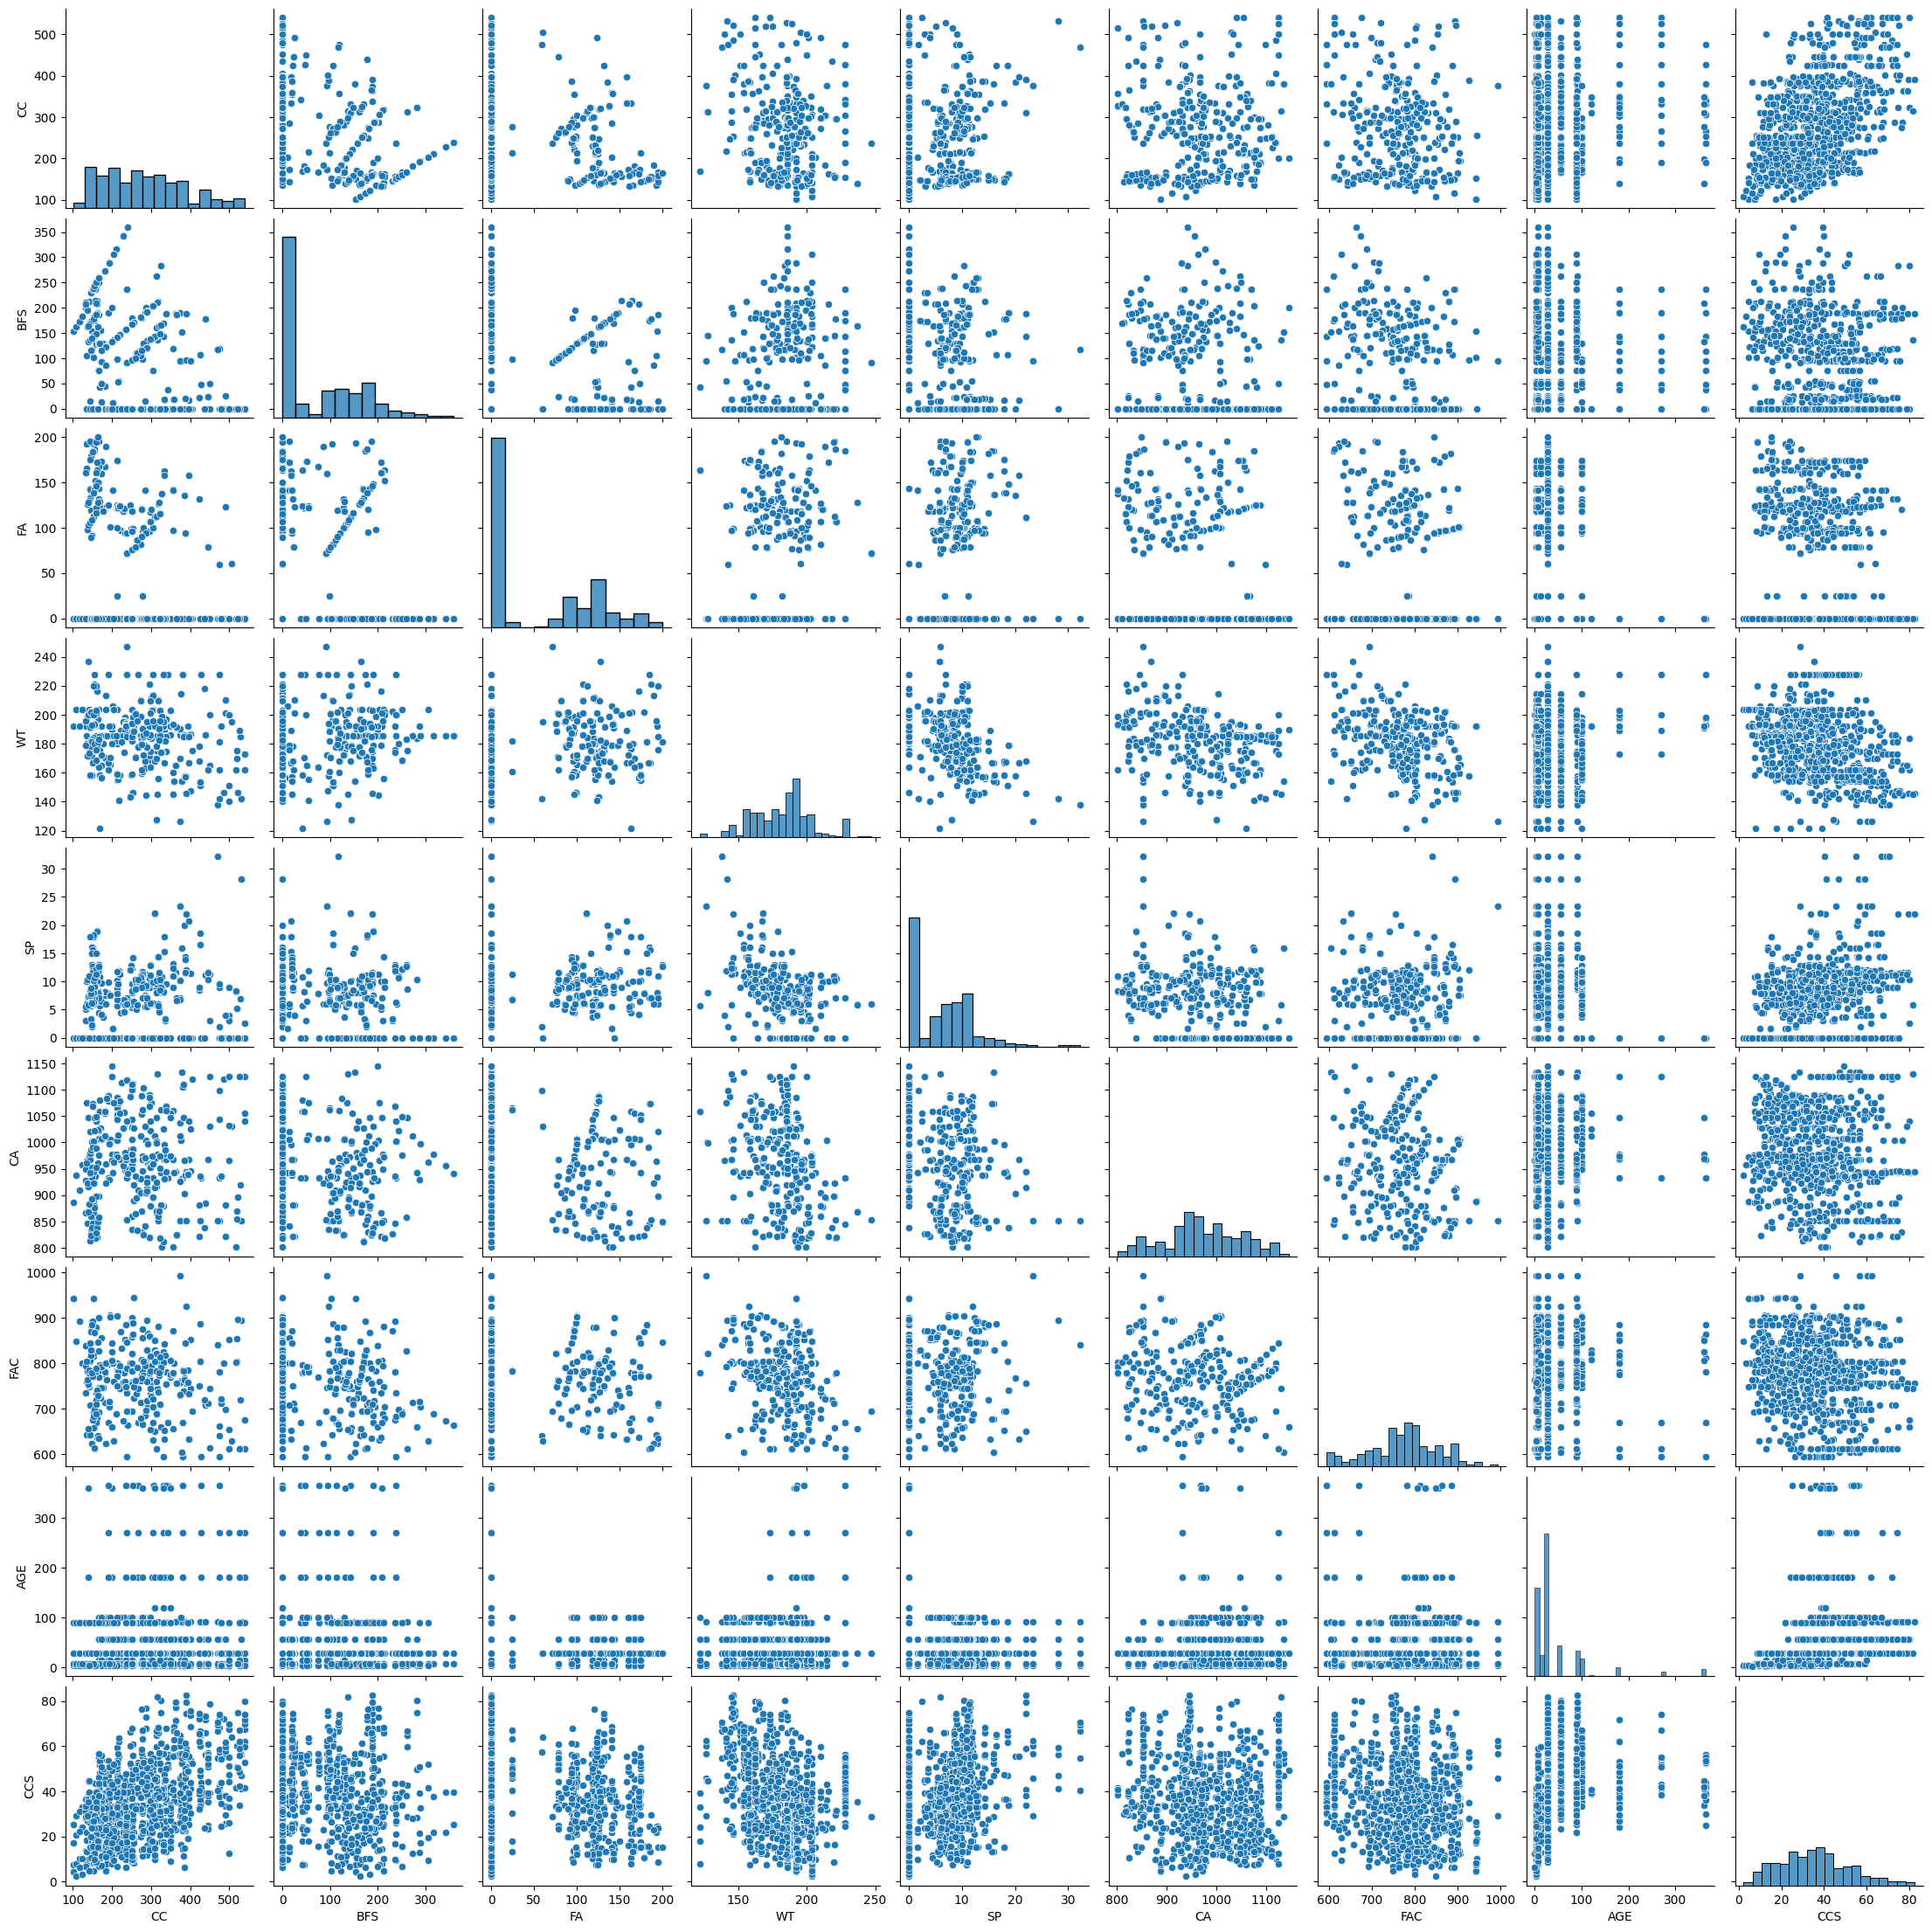

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data2)
plt.show()

In [ ]:
sns.jointplot(x="CC", y="CCS", data=data1, kind="reg")
plt.show()

In [ ]:
sns.jointplot(x="CC", y="CCS", data=data1, kind="reg")
plt.show()


In [ ]:
sns.jointplot(x="BFS", y="CCS", data=data1, kind="reg")
plt.show()


In [ ]:
sns.jointplot(x="FA", y="CCS", data=data1, kind="reg")
plt.show()


In [ ]:
sns.jointplot(x="WT", y="CCS", data=data1, kind="reg")
plt.show()


In [ ]:
sns.jointplot(x="SP", y="CCS", data=data1, kind="reg")
plt.show()


In [ ]:
sns.jointplot(x="CA", y="CCS", data=data1, kind="reg")
plt.show()


In [ ]:
sns.jointplot(x="FAC", y="CCS", data=data1, kind="reg")
plt.show()


In [ ]:
sns.jointplot(x="AGE", y="CCS", data=data1, kind="reg")
plt.show()


In [ ]:
# Heat Map of correlation

In [15]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC      1030 non-null   float64
 1   BFS     1030 non-null   float64
 2   FA      1030 non-null   float64
 3   WT      1030 non-null   float64
 4   SP      1030 non-null   float64
 5   CA      1030 non-null   float64
 6   FAC     1030 non-null   float64
 7   AGE     1030 non-null   int64  
 8   CCS     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
# Application of ML

In [10]:
from pycaret import *

In [11]:
from pycaret.regression import *

In [12]:
experiment1 = setup(data=data3, target="CCS", 
                              numeric_features=["CC", "BFS",
                                                "FA", "WT", "SP", 
                                                "CA","FAC",
                                                "AGE"], 
                   ignore_features=["ID"],
                   fold_strategy='kfold', fold=10,
                   train_size=0.70, session_id=1234)

,Description,Value
0,Session id,1234
1,Target,CCS
2,Target type,Regression
3,Original data shape,"(1030, 9)"
4,Transformed data shape,"(1030, 9)"
5,Transformed train set shape,"(721, 9)"
6,Transformed test set shape,"(309, 9)"
7,Ignore features,1
8,Numeric features,8
9,Preprocess,True


In [ ]:
#Create all ml models for regression

In [ ]:
best = compare_models()

In [ ]:
# Top Models

In [13]:
catboost1= experiment1.create_model('catboost')
lightgbm1= experiment1.create_model('lightgbm')
xgboost1= experiment1.create_model('xgboost')
#et1= experiment1.create_model('et')
#rf1= experiment1.create_model('rf')
#gbr1= experiment1.create_model('gbr')
#dt1= experiment1.create_model('dt')
#ada1= experiment1.create_model('ada')
#knn1= experiment1.create_model('knn')
#br1= experiment1.create_model('br')
#lar1= experiment1.create_model('lar')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2764,12.5772,3.5464,0.9617,0.1091,0.0744
1,3.0173,18.2918,4.2769,0.9273,0.1111,0.0830
2,2.3107,8.7367,2.9558,0.9730,0.1329,0.1096
3,2.7983,16.0285,4.0036,0.9403,0.1516,0.1019
4,2.4134,11.9670,3.4593,0.9585,0.1034,0.0820
5,3.3265,38.9265,6.2391,0.8808,0.1753,0.1218
6,3.3820,28.5745,5.3455,0.9036,0.1578,0.1186
7,3.1849,20.5405,4.5322,0.9295,0.1080,0.0842
8,2.7158,15.6026,3.9500,0.9216,0.1179,0.0857


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0077,16.7985,4.0986,0.9489,0.1304,0.1030
1,3.7597,24.7399,4.9739,0.9016,0.1428,0.1086
2,2.7006,13.7962,3.7143,0.9573,0.1600,0.1270
3,3.1582,22.7988,4.7748,0.9151,0.1755,0.1202
4,2.8808,17.0927,4.1343,0.9407,0.1269,0.0998
5,3.7637,41.2915,6.4258,0.8736,0.1870,0.1379
6,3.4644,30.9680,5.5649,0.8955,0.1702,0.1259
7,3.8888,32.3304,5.6860,0.8890,0.1369,0.1013
8,3.3985,21.7780,4.6667,0.8906,0.1458,0.1111


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7000,15.7366,3.9669,0.9521,0.1400,0.1014
1,3.4737,25.9948,5.0985,0.8966,0.1331,0.0958
2,2.4921,16.6236,4.0772,0.9485,0.1349,0.1038
3,3.2861,21.9161,4.6815,0.9184,0.1550,0.1150
4,2.9201,17.1303,4.1389,0.9406,0.1297,0.1035
5,3.4875,39.2588,6.2657,0.8798,0.1750,0.1255
6,3.7928,37.9769,6.1625,0.8718,0.1888,0.1359
7,3.4377,26.0568,5.1046,0.9105,0.1159,0.0845
8,2.7155,18.0476,4.2482,0.9093,0.1254,0.0890


In [14]:
# create indepednet and depednet variable from the data set;  x and y
X_data = data3.drop(["CCS"], axis=1)  # Features
y_data = data3['CCS']  # Target variable

In [15]:
# create mse mean and sd plots

#catboost, lightgbm, xgboost

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2764,12.5772,3.5464,0.9617,0.1091,0.0744
1,3.0173,18.2918,4.2769,0.9273,0.1111,0.0830
2,2.3107,8.7367,2.9558,0.9730,0.1329,0.1096
3,2.7983,16.0285,4.0036,0.9403,0.1516,0.1019
4,2.4134,11.9670,3.4593,0.9585,0.1034,0.0820
5,3.3265,38.9265,6.2391,0.8808,0.1753,0.1218
6,3.3820,28.5745,5.3455,0.9036,0.1578,0.1186
7,3.1849,20.5405,4.5322,0.9295,0.1080,0.0842
8,2.7158,15.6026,3.9500,0.9216,0.1179,0.0857


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0077,16.7985,4.0986,0.9489,0.1304,0.1030
1,3.7597,24.7399,4.9739,0.9016,0.1428,0.1086
2,2.7006,13.7962,3.7143,0.9573,0.1600,0.1270
3,3.1582,22.7988,4.7748,0.9151,0.1755,0.1202
4,2.8808,17.0927,4.1343,0.9407,0.1269,0.0998
5,3.7637,41.2915,6.4258,0.8736,0.1870,0.1379
6,3.4644,30.9680,5.5649,0.8955,0.1702,0.1259
7,3.8888,32.3304,5.6860,0.8890,0.1369,0.1013
8,3.3985,21.7780,4.6667,0.8906,0.1458,0.1111


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7000,15.7366,3.9669,0.9521,0.1400,0.1014
1,3.4737,25.9948,5.0985,0.8966,0.1331,0.0958
2,2.4921,16.6236,4.0772,0.9485,0.1349,0.1038
3,3.2861,21.9161,4.6815,0.9184,0.1550,0.1150
4,2.9201,17.1303,4.1389,0.9406,0.1297,0.1035
5,3.4875,39.2588,6.2657,0.8798,0.1750,0.1255
6,3.7928,37.9769,6.1625,0.8718,0.1888,0.1359
7,3.4377,26.0568,5.1046,0.9105,0.1159,0.0845
8,2.7155,18.0476,4.2482,0.9093,0.1254,0.0890


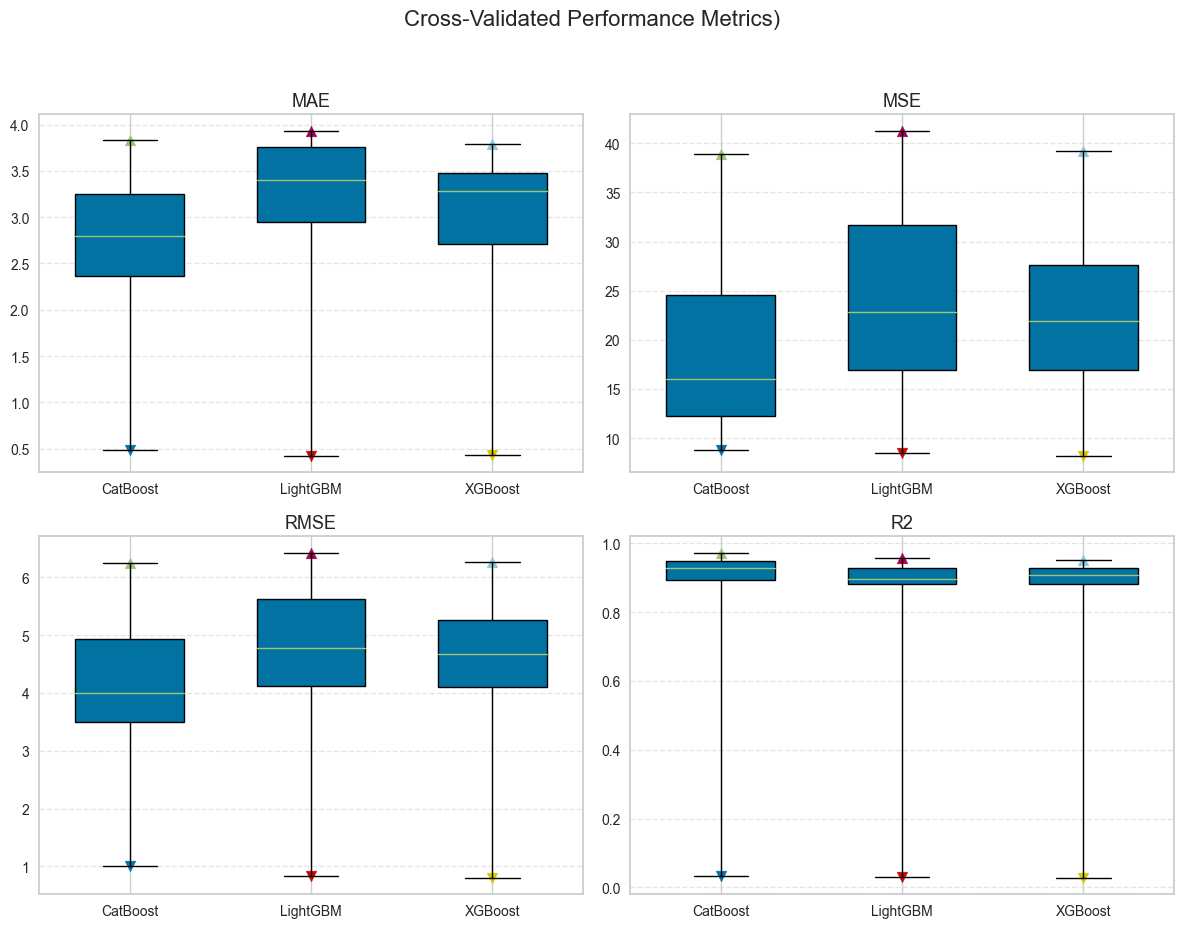

In [16]:
models = ['catboost', 'lightgbm', 'xgboost']
model_names = ['CatBoost', 'LightGBM', 'XGBoost']
metrics = ['MAE', 'MSE', 'RMSE', 'R2']

box_data = {metric: [] for metric in metrics}

for m in models:
    create_model(m)
    res = pull()
    fold_res = res.loc[~res.index.isin(['Mean', 'SD'])]

    for metric in metrics:
        box_data[metric].append(
            fold_res[metric].astype(float).values
        )


import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    data = box_data[metric]

    axes[i].boxplot(
        data,
        labels=model_names,
        widths=0.6,
        whis=(0, 100),          # 🔹 force whiskers to min–max
        showfliers=False,
        patch_artist=True
    )

    # Add min & max points explicitly
    for j, values in enumerate(data, start=1):
        axes[i].scatter(j, np.min(values), marker='v', s=60)
        axes[i].scatter(j, np.max(values), marker='^', s=60)

    axes[i].set_title(metric, fontsize=13)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle(
    'Cross-Validated Performance Metrics)',
    fontsize=16,
    y=1.03
)

plt.tight_layout()
plt.show()


In [ ]:
# evaluate the models
#catboost1, lightgbm1, xgboost1, et1, rf1,gbr1, dt1, ada1, knn1,br1
#print(catboost1.feature_importances_, catboost1.feature_names_)
#print(lightgbm1.feature_importances_, lightgbm1.feature_name_)
#print(xgboost1.feature_importances_, xgboost1.feature_names_in_)


In [ ]:
#catboost1_tune= tune_model(catboost1)
#lightgbm1_tune= tune_model(lightgbm1)
#xgboost1_tune= tune_model(xgboost1)

In [17]:
#catboost1_tune
#lightgbm1_tune
#xgboost1_tune

In [ ]:
#print(catboost1_tune, lightgbm1_tune, xgboost1_tune)

In [ ]:
#xgboost1_tune.get_params()

In [ ]:
#evaluate_model(catboost1)
#evaluate_model(lightgbm1)
#evaluate_model(xgboost1)

In [18]:
from explainerdashboard import *

In [ ]:
# evaluate each of the model catboost1, xgboost1 and lightgbm1

In [19]:
explainer1 = RegressionExplainer(catboost1, X_data, y_data)
ExplainerDashboard(explainer1, shap_interaction=False).run()

In [ ]:
# Create a blended model

In [20]:
blender = experiment1.blend_models([catboost1, xgboost1, lightgbm1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.4392,12.9644,3.6006,0.9606,0.1147,0.0834
1,3.2052,20.5149,4.5293,0.9184,0.1195,0.0879
2,2.3676,11.5098,3.3926,0.9644,0.1370,0.1089
3,2.9120,17.6020,4.1955,0.9345,0.1519,0.1042
4,2.4261,13.0615,3.6141,0.9547,0.1089,0.0840
5,3.3189,37.6123,6.1329,0.8848,0.1730,0.1211
6,3.3191,29.4531,5.4271,0.9006,0.1644,0.1201
7,3.3534,24.4517,4.9449,0.9160,0.1130,0.0856
8,2.7140,15.9437,3.9930,0.9199,0.1192,0.0869


In [21]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
explainer2 = RegressionExplainer(blender,X=X_data, y=y_data)
ExplainerDashboard(explainer2, shap_interaction=False).run()

Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/1030 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.10:8050


ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_4132a631-bd57-4c60-ab6d-e6e100291e85 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001A5CFB1A760>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))

In [ ]:
# Taylor diagram

In [ ]:
# Models are catboost1, lightgbm1, xgboost1
# using test data for the same

In [23]:
pred1 = predict_model(catboost1, data=experiment1.X_test)
pred2 = predict_model(lightgbm1, data=experiment1.X_test)
pred3 = predict_model(xgboost1, data=experiment1.X_test)

actual = experiment1.y_test.values
p1 = pred1['prediction_label'].values
p2 = pred2['prediction_label'].values
p3 = pred3['prediction_label'].values

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def taylor_statistics(obs, sim):
    corr = np.corrcoef(obs, sim)[0, 1]
    std_sim = np.std(sim, ddof=1)
    std_obs = np.std(obs, ddof=1)
    crmsd = np.sqrt(np.mean(((sim - sim.mean()) - (obs - obs.mean()))**2))
    return corr, std_sim, std_obs, crmsd

In [26]:
stats = {
    "CatBoost": taylor_statistics(actual, p1),
    "LightGBM": taylor_statistics(actual, p2),
    "XGBoost": taylor_statistics(actual, p3)
}

std_obs = list(stats.values())[0][2]

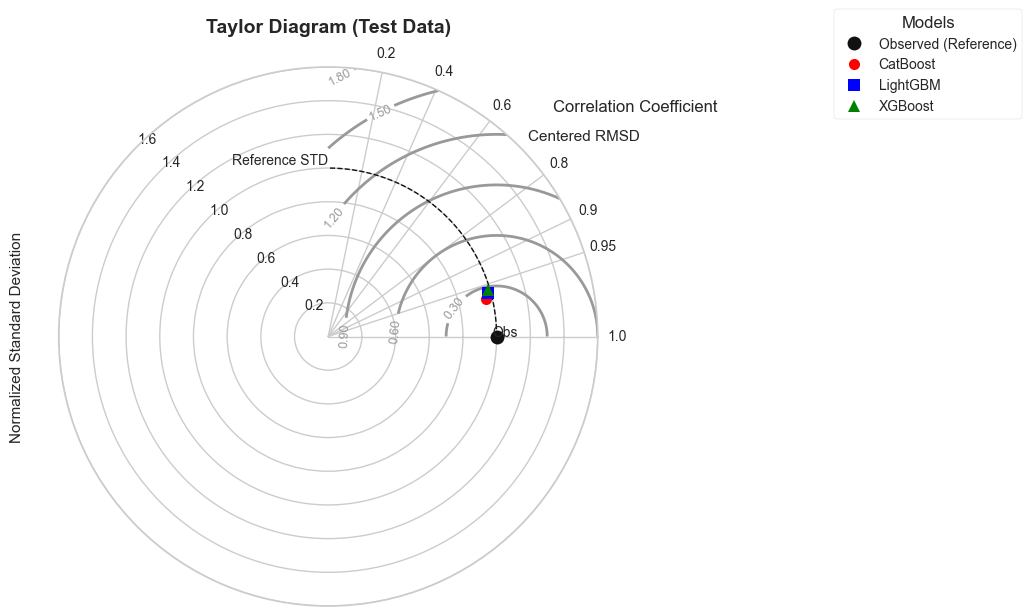

In [37]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, polar=True)

# Normalize standard deviation
max_std = 1.6

# ----- RMSD contours -----
rs, ts = np.meshgrid(np.linspace(0, max_std, 200),
                     np.linspace(0, np.pi/2, 200))

rms = np.sqrt(1 + rs**2 - 2 * rs * np.cos(ts))
contours = ax.contour(ts, rs, rms, levels=6, colors='0.6', linewidths=2)
ax.clabel(contours, inline=1, fontsize=9, fmt="%.2f")

# Label RMSD field
ax.text(np.pi/4, max_std*1.05, "Centered RMSD",
        ha='left', va='center', fontsize=11)

# ----- Reference observation -----
ax.plot(0, 1, 'ko', markersize=10, label='Observed (Reference)')
ax.text(0, 1.05, "Obs", ha='center', fontsize=10)

# Reference standard deviation circle
theta = np.linspace(0, np.pi/2, 200)
ax.plot(theta, np.ones_like(theta), 'k--', lw=1)
ax.text(np.pi/2, 1.02, "Reference STD", fontsize=10, ha='right')

# ----- Plot models -----
markers = ['o', 's', '^']
colors = ['red', 'blue', 'green']

for (name, (corr, std_sim, std_obs, crmsd)), m, c in zip(stats.items(), markers, colors):
    theta_val = np.arccos(corr)
    r = std_sim / std_obs
    ax.plot(theta_val, r, marker=m, color=c, linestyle='',
            label=name, markersize=8)

# ----- Correlation ticks -----
corr_ticks = np.array([0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 1])
ax.set_thetagrids(np.degrees(np.arccos(corr_ticks)), labels=corr_ticks)

# Correlation axis label
ax.text(np.deg2rad(45), max_std*1.18, "Correlation Coefficient",
        ha='left', fontsize=12)

# ----- Radial axis -----
ax.set_ylim(0, max_std)
ax.set_rlabel_position(135)
ax.set_ylabel("Normalized Standard Deviation", labelpad=25)

# Better radial ticks
ax.set_yticks(np.arange(0.2, max_std+0.01, 0.2))

# ----- Title & legend -----
ax.set_title("Taylor Diagram (Test Data)", pad=25, fontsize=14, weight='bold')

ax.legend(loc='upper right', bbox_to_anchor=(1.8, 1.12),
          title="Models", frameon=True)

plt.show()